In [15]:
#Import Library , tahap awal untuk menggunakan fungsi dalam rdkit dan PyFingerprint

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults


from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

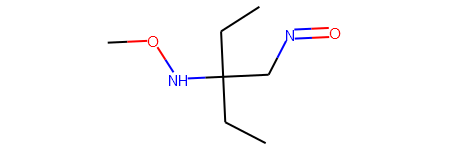

In [35]:
#cara membaca file smiles menjai mol
mol = Chem.MolFromSmiles("CONC(CC)(CC)CN=O")
mol2 = Chem.MolFromSmiles("CONC(CC)(CC)")
mol

In [7]:
print(mol)

In [9]:
#Mol to SMILES
smiles = Chem.MolToSmiles(mol)
smiles

'CCC(C)CC'

In [37]:
#molecule weigth
weight = Descriptors.MolWt(mol)
balaban = Descriptors.BalabanJ(mol)
radius = Descriptors.HeavyAtomMolWt(mol)
radius

144.08899999999997

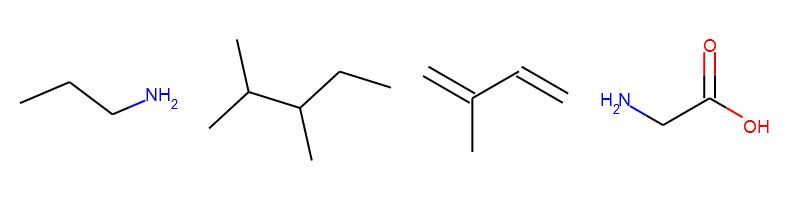

In [18]:
#Draw group of molecule
smiles_list = ["CCCN", "C(C)(C)C(C)C(C)", "C=C(C)C=C", "C(C(=O)O)N"]

mol_list = []

for x in smiles_list:
    mol = Chem.MolFromSmiles(x)
    mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

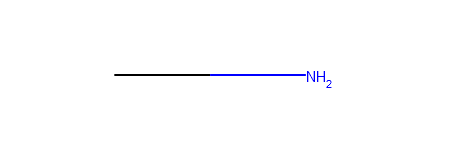

In [21]:
#Finding Pattern of Substructure
pattern = Chem.MolFromSmiles('CN')
pattern

In [22]:
#Finding Pattern of Substructure
pattern = Chem.MolFromSmiles('CN')

for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

True
False
False
True


In [68]:
#Draw A fingerprints
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol_list[1], 2, nBits = 2048, bitInfo = bi)
#buat list kosong
fp_arr = np.zeros((1),)

#Masukkan index fingerprint ke dalam list kosong
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)

(array([   1,   80,  283,  294, 1032, 1057, 1381, 1544, 1719, 1773, 1785],
       dtype=int64),)

In [61]:
prints = [(mol_list[1],x,bi) for x in fp.GetOnBits()]

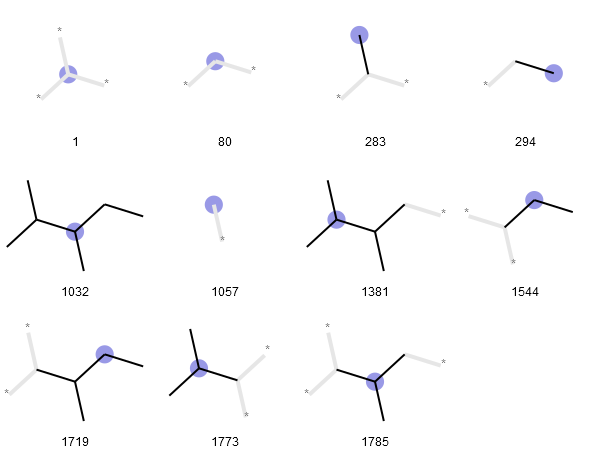

In [62]:
#Draw FP list location
Draw.DrawMorganBits(prints, molsPerRow=4, legends = [str(x) for x in fp.GetOnBits()])

# Mencari nilai kesamaan antara molekul

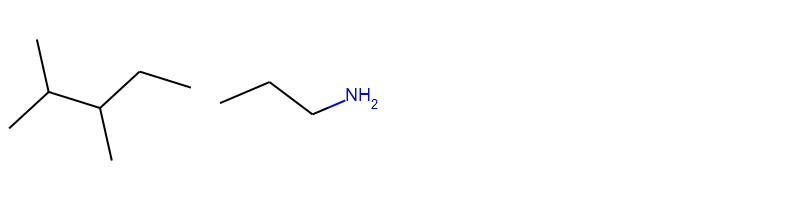

In [73]:
#pilih 2 molekul
img = Draw.MolsToGridImage([mol_list[1],mol_list[0]], molsPerRow=4)
img

In [71]:
bi = {}
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_list[0], 2, nBits = 2048, bitInfo = bi)
#buat list kosong
fp2_arr = np.zeros((1),)

#Masukkan index fingerprint ke dalam list kosong
DataStructs.ConvertToNumpyArray(fp2,fp2_arr)
np.nonzero(fp2_arr)

(array([  80,  294,  794,  981, 1046, 1057, 1171, 1840], dtype=int64),)

In [72]:
print("1. ", list(fp.GetOnBits()))
print("2. ", list(fp2.GetOnBits()))

1.  [1, 80, 283, 294, 1032, 1057, 1381, 1544, 1719, 1773, 1785]
2.  [80, 294, 794, 981, 1046, 1057, 1171, 1840]


In [75]:
#compute Tanimoto Similarity Index (A∩B)/(AuB)
print(DataStructs.TanimotoSimilarity(fp,fp2))

0.1875
